In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
climatedf = pd.read_csv('ClimateData.csv')
metadf = pd.read_csv('metadata.csv')

## 1. Please take a look at the data types and summary of our variables.

In [3]:
climatedf.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [4]:
climatedf.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


In [5]:
climatedf = climatedf.drop('id', axis = 1)

In [6]:
climatedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_class        75757 non-null  object 
 1   floor_area            75757 non-null  float64
 2   year_built            73920 non-null  float64
 3   precipitation_inches  75757 non-null  float64
 4   snowfall_inches       75757 non-null  float64
 5   avg_temp              75757 non-null  float64
 6   days_with_fog         29961 non-null  float64
 7   site_eui              75757 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.6+ MB


## 2. Summarize the number of unique values in each column.

In [7]:
cols = list(climatedf.columns)
uniques = [len(climatedf[name].unique()) for name in cols]
uniquedict = dict(zip(cols,uniques))
uniquedict

{'building_class': 2,
 'floor_area': 20433,
 'year_built': 181,
 'precipitation_inches': 171,
 'snowfall_inches': 71,
 'avg_temp': 173,
 'days_with_fog': 43,
 'site_eui': 17203}

In [8]:
unique_df = pd.DataFrame(uniquedict, index=["Unique Values"])

In [9]:
unique_df

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
Unique Values,2,20433,181,171,71,173,43,17203


## 3. Check at descriptive statistics for the Dataset

In [10]:
climatedf.describe()

,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


## 4. Check the number of missing values.

In [11]:
climatedf.isna().sum()

building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

## 5. Take care of missing data. You can decide to remove or use the imputation

In [12]:
climatedf['days_with_fog'].fillna(climatedf['days_with_fog'].mean(), inplace=True)

In [13]:
climatedf.isna().sum()

building_class             0
floor_area                 0
year_built              1837
precipitation_inches       0
snowfall_inches            0
avg_temp                   0
days_with_fog              0
site_eui                   0
dtype: int64

In [14]:
climatedf = climatedf.dropna(subset=['year_built'])

## 6. Find and remove duplicate variables,

In [15]:
climatedf = climatedf.drop_duplicates()

## 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [16]:
dummy_replace = climatedf['building_class'].str.get_dummies()

In [17]:
climatedf = climatedf.drop('building_class',axis=1)

In [18]:
climatedf = pd.concat([dummy_replace, climatedf],axis=1)

In [19]:
climatedf

,Commercial,Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,1,0,61242.0,1942.0,16.59,0.0,56.972603,109.142051,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,1,0,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,1,0,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,1,0,66000.0,1985.0,16.59,0.0,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...,...
75752,1,0,20410.0,1995.0,45.03,1.4,55.147541,109.142051,132.92
75753,0,1,40489.0,1910.0,45.03,1.4,55.147541,109.142051,39.48
75754,1,0,28072.0,1917.0,106.32,36.6,47.911202,109.142051,48.40
75755,1,0,53575.0,2012.0,106.32,36.6,47.911202,109.142051,592.02


In [20]:
climatedf.isna().sum()

Commercial              0
Residential             0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64

In [21]:
climatedf.duplicated().sum()

0

In [22]:
climatedf.describe()

,Commercial,Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,73894.000000,73894.000000,7.389400e+04,73894.000000,73894.000000,73894.000000,73894.000000,73894.000000,73894.000000
mean,0.416313,0.583687,1.660673e+05,1952.307332,42.705284,29.459344,56.104098,109.420202,82.738175
std,0.492950,0.492950,2.440536e+05,37.057848,10.037825,17.658118,2.111738,31.935118,57.762260
min,0.000000,0.000000,1.800000e+03,0.000000,4.160000,0.000000,44.512329,12.000000,1.000000
25%,0.000000,0.000000,6.279000e+04,1927.000000,39.350000,9.600000,55.147541,109.142051,55.160000
50%,0.000000,1.000000,9.200000e+04,1951.000000,42.170000,33.700000,56.835616,109.142051,75.520000
75%,1.000000,1.000000,1.663012e+05,1977.000000,46.320000,49.100000,57.215847,109.142051,97.330000
max,1.000000,1.000000,6.353396e+06,2015.000000,107.690000,69.800000,63.398630,311.000000,997.870000


## 8. Create the boxplot and show the outlier.


In [23]:
def plotBox(ds, col_name):
    if ds[col_name].dtypes not in [np.single, np.double, int]:
        return
    plt.boxplot(ds[col_name], vert=False)
    plt.xlabel(f"{col_name}")
    plt.title(f"{col_name} Variable Boxplot")
    plt.show()

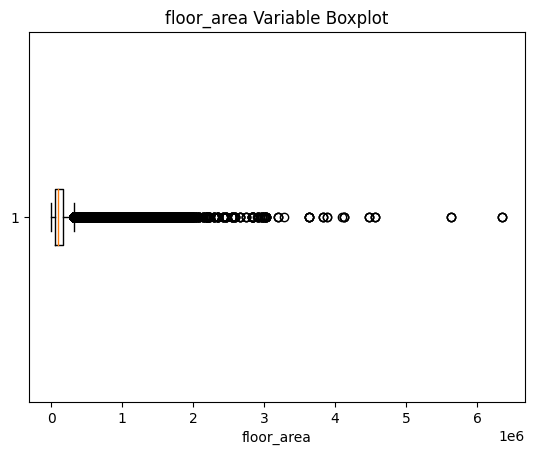

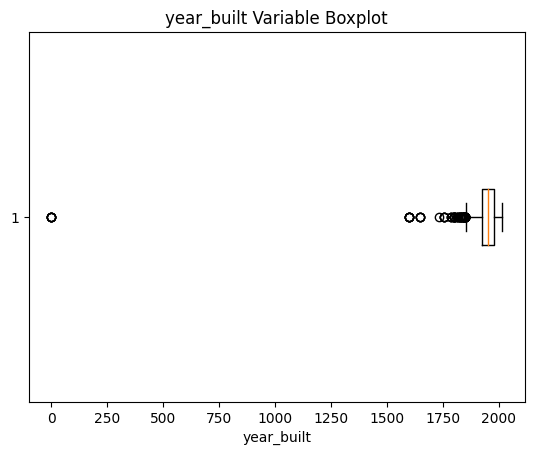

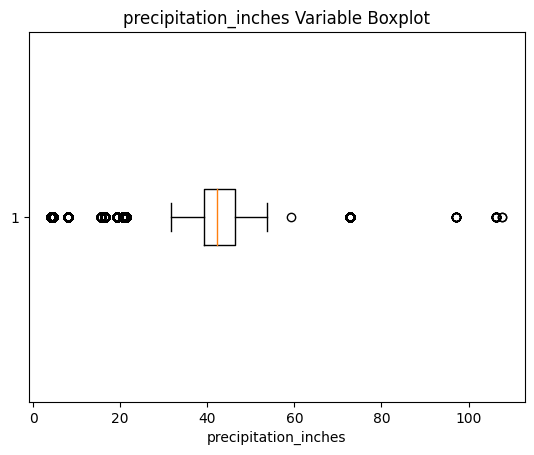

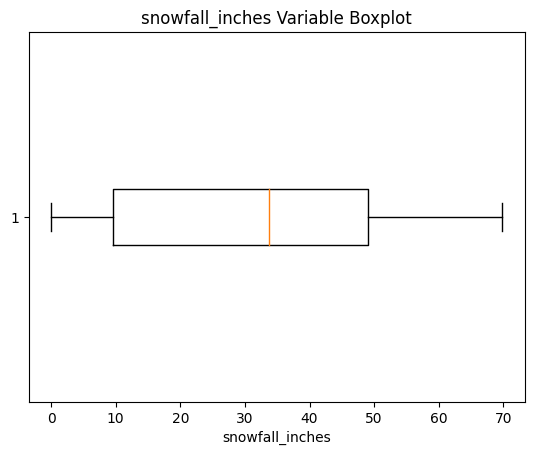

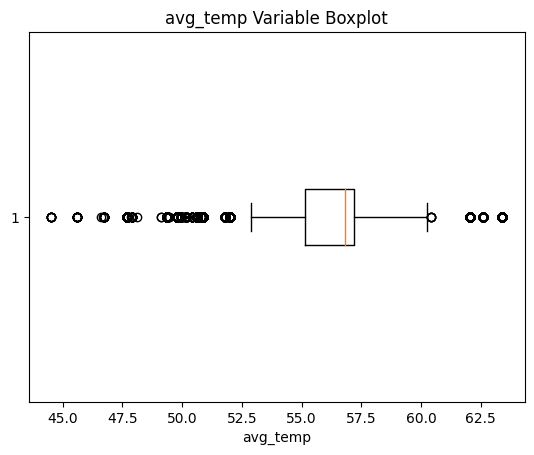

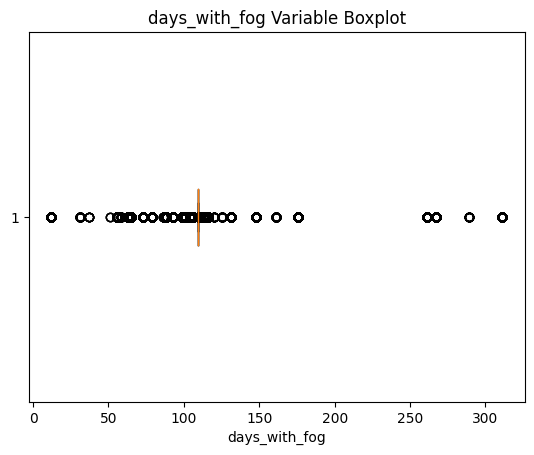

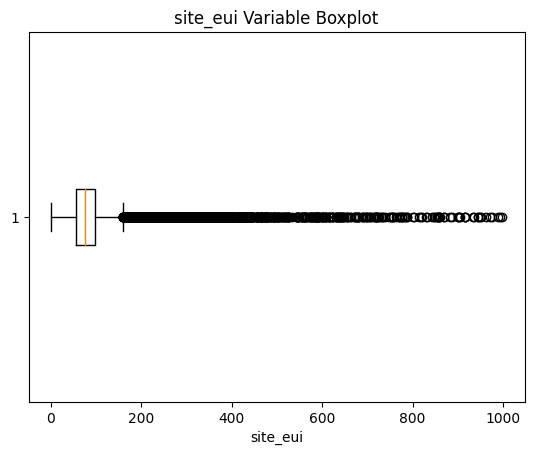

In [24]:
cols = list(climatedf.columns)
for name in cols:
    plotBox(climatedf,name)

## 9. Create the histogram and check the outliers.

In [25]:
def plotHist(ds, col_name, bins=10):
    if ds[col_name].dtypes not in [np.single, np.double, int]:
        return
    
    counts, bins = np.histogram(ds[col_name], bins=bins)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.xlabel(f"{col_name}")
    plt.title(f"{col_name} Variable Histogram")
    plt.show()

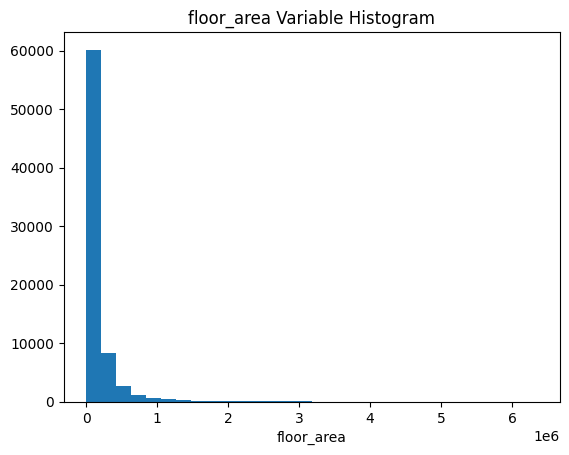

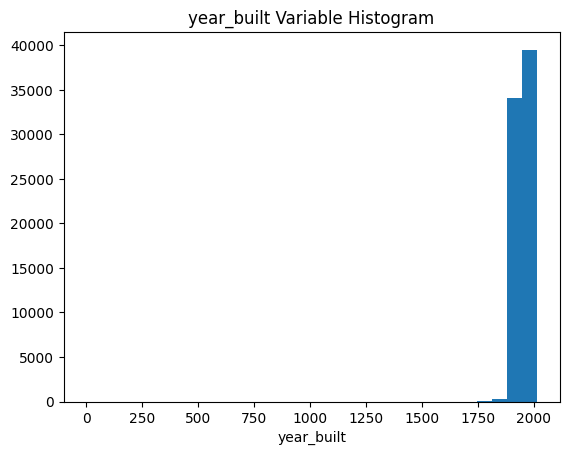

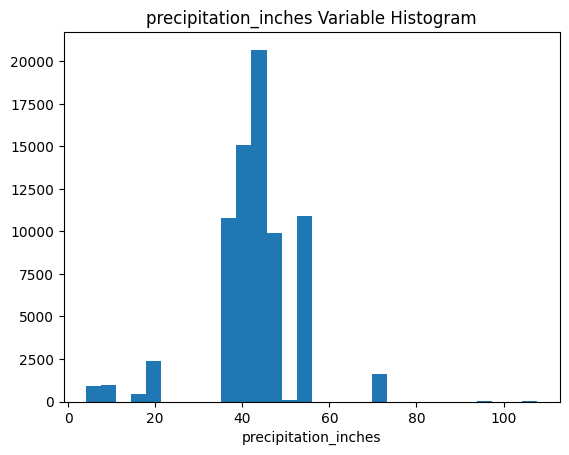

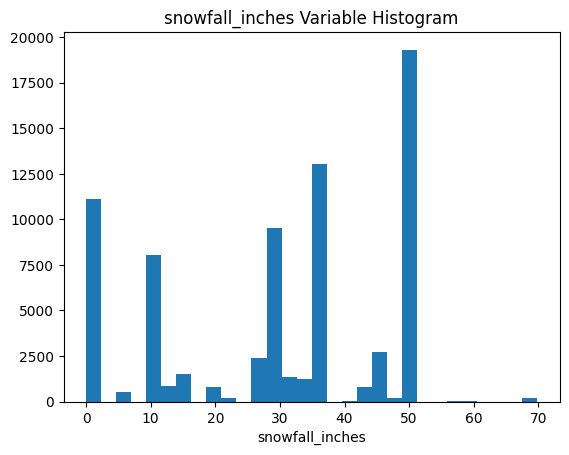

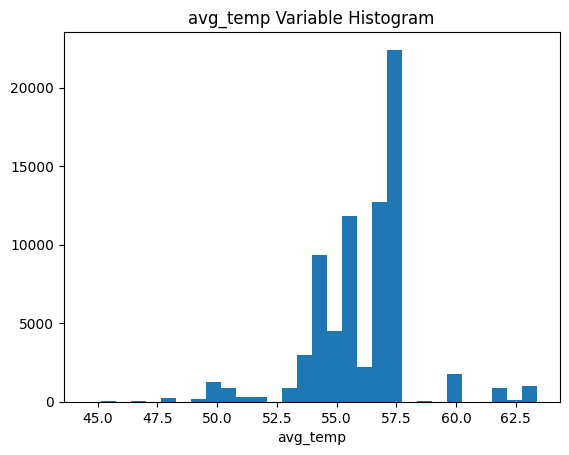

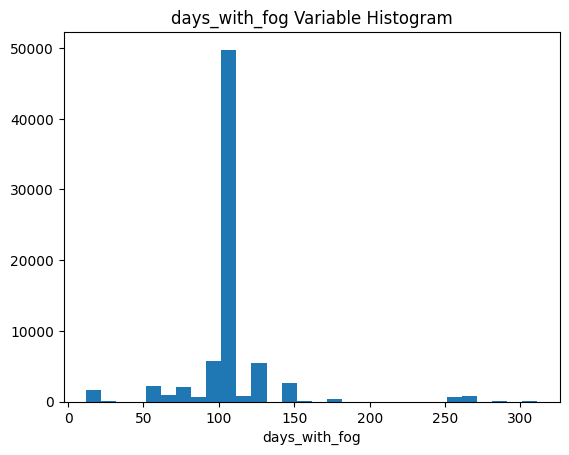

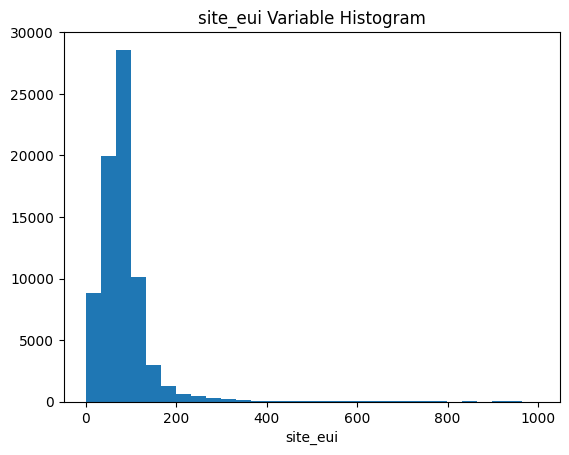

In [26]:
for name in cols:
    plotHist(climatedf,name,30)

## 10. If feature scaling is needed, do it, please.

In [27]:
climatedf1 = climatedf.drop(['Commercial', 'Residential'],axis=1)
climatedf1_norm = (climatedf1-climatedf1.min())/(climatedf1.max()-climatedf1.min())
climatedf1_norm = pd.concat((dummy_replace,climatedf1_norm),axis=1)

In [28]:
climatedf1_norm

,Commercial,Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,1,0,0.009359,0.963772,0.120062,0.000000,0.659752,0.32489,0.248458
1,1,0,0.042855,0.970223,0.120062,0.000000,0.659752,0.00000,0.025580
2,1,0,0.043804,0.968238,0.120062,0.000000,0.659752,0.00000,0.023764
3,1,0,0.008427,0.982630,0.120062,0.000000,0.659752,0.00000,0.047559
4,1,0,0.010108,0.985112,0.120062,0.000000,0.659752,0.32489,0.002909
...,...,...,...,...,...,...,...,...,...
75752,1,0,0.002930,0.990074,0.394765,0.020057,0.563118,0.32489,0.132334
75753,0,1,0.006091,0.947891,0.394765,0.020057,0.563118,0.32489,0.038601
75754,1,0,0.004136,0.951365,0.986767,0.524355,0.179965,0.32489,0.047549
75755,1,0,0.008151,0.998511,0.986767,0.524355,0.179965,0.32489,0.592876


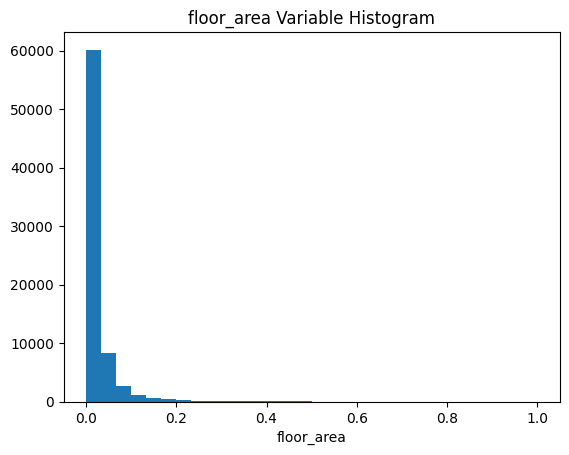

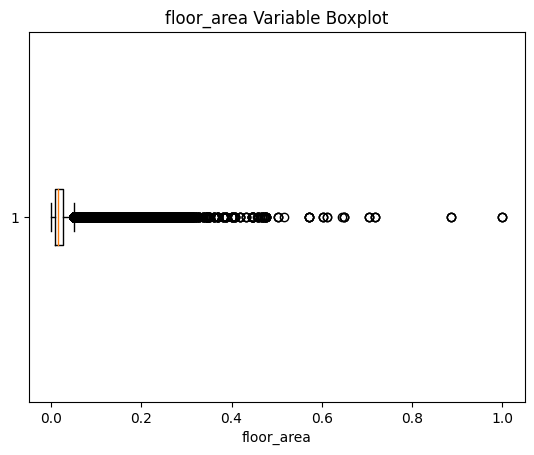

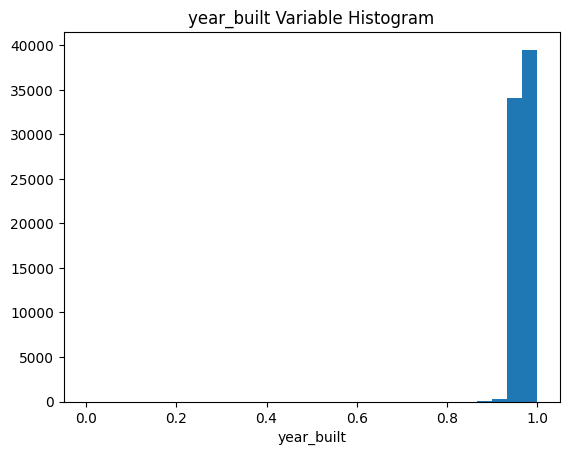

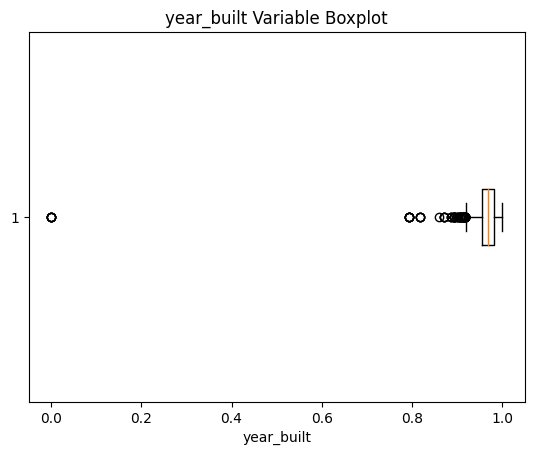

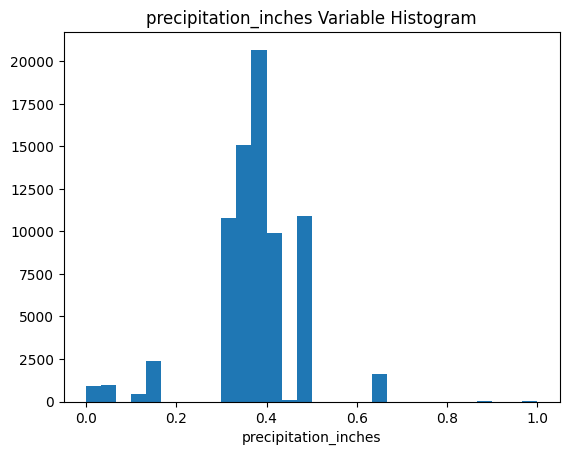

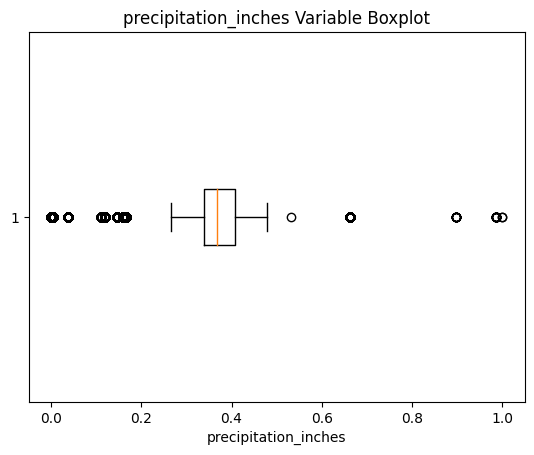

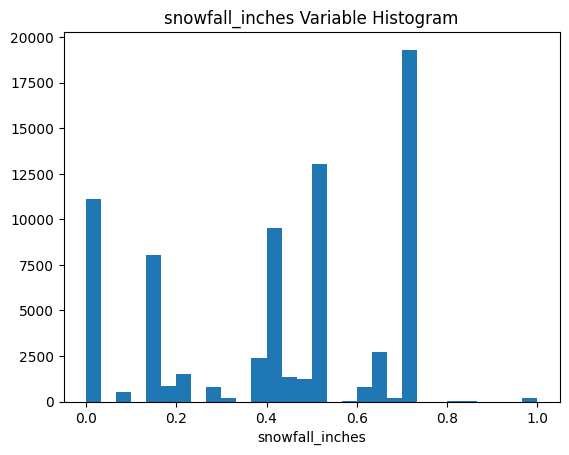

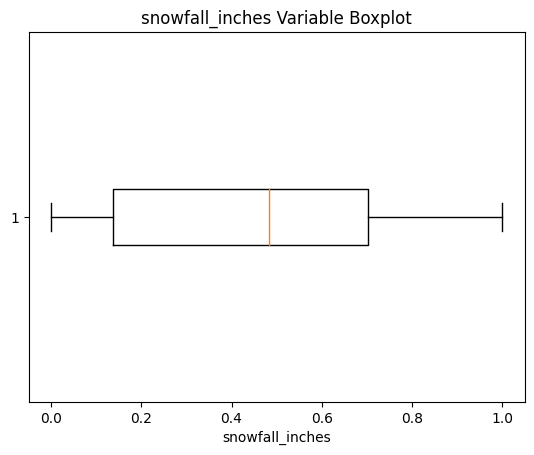

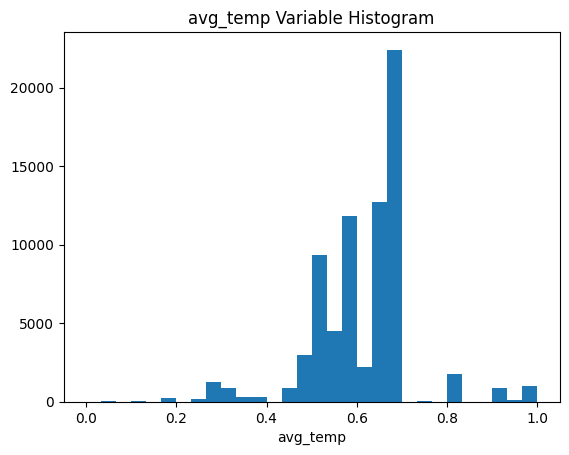

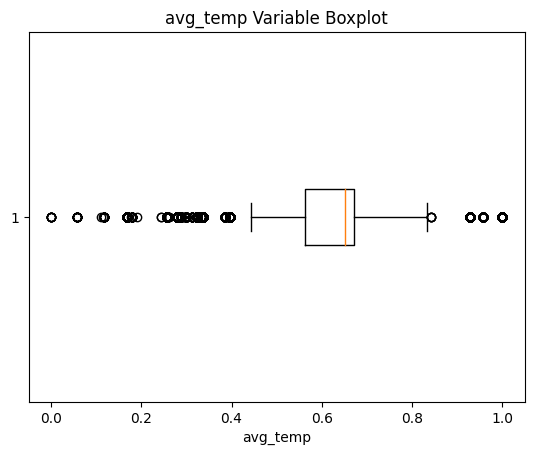

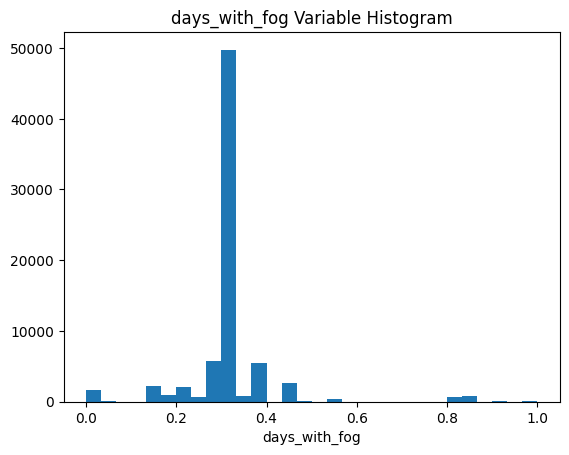

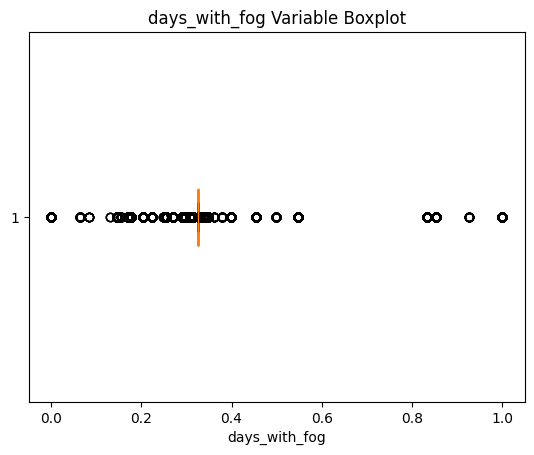

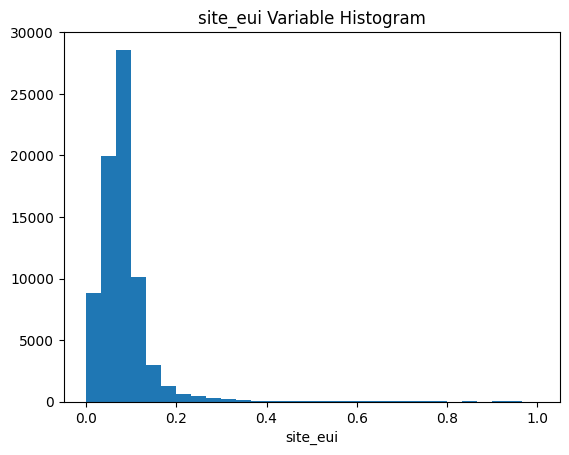

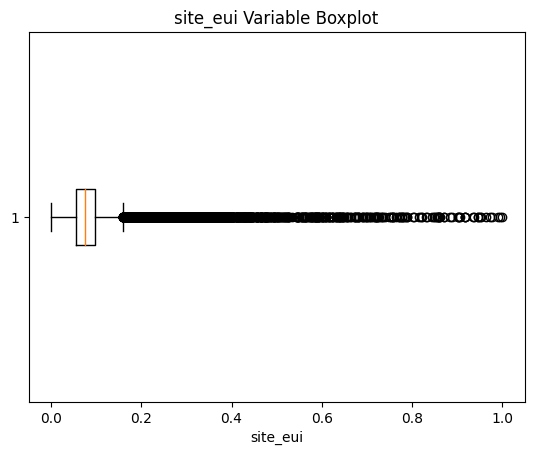

In [29]:
for name in cols:
    plotHist(climatedf1_norm,name,30)
    plotBox(climatedf1_norm,name)